## PROBLEM STATEMENT
#### The Loan providing companies facing issues to give loans to the people due to their insufficient or non-existent credit history, because of that some consumers taking it as advantage and becoming Defaulter,here we need to help financial company to find out applicants who is capable to repay the loan by performing EDA Analysis.

## OBJECTIVE
#### To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  We need to use EDA techniques to find out the driving factors & provide recommendations to the company based on our findings.

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1. Normal Routine check

In [4]:
df.shape

(307511, 122)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 2. Checking Missing Values

#### 2.1 Finding the Null percentages in each column

In [7]:
df.isnull().sum()/len(df)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

#### 2.2 Finding high missing columns(missing >= 0.47 or 47% as found out from data)

In [8]:
highMissing = df.isnull().sum()/len(df)
highMissing=highMissing[highMissing>=0.47]
highMissing.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

#### 2.3 Removing these high missing columns

In [9]:
df.drop(labels=highMissing.index,axis=1,inplace=True)

In [10]:
#Confirming dataframe after dropping columns
df.isnull().sum()/len(df)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


## 3. Imputing 5 columns with 13% null values

In [11]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize = True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [12]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize = True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [13]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize = True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [14]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize = True)

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [15]:
df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize = True)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [16]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize = True)

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
7.0      0.000026
8.0      0.000026
19.0     0.000004
261.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

### 3-Solution : For all these 5 columns, we can impute the median value inplace of null values

## 4. Checking & changing data types of columns

In [17]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

#### 4.1 Changing 10 continuous columns into numeric type

In [18]:
countinuous_columns = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
df[countinuous_columns]=df[countinuous_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.2 Taking absolute values of date of birth column

In [19]:
df["DAYS_BIRTH"] = abs(df["DAYS_BIRTH"])
df["DAYS_BIRTH"].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
10292    40
14267    39
13263    39
11664    39
14395    39
15042    38
14791    38
13788    38
13480    38
13634    38
13891    38
13584    38
15565    38
13217    37
15563    37
16257    37
14790    37
14890    37
16690    37
10107    37
12806    37
15048    37
15450    37
10192    37
11108    37
14767    37
20074    37
14276    37
10136    37
14386    36
14137    36
13708    36
11524    36
13904    36
14776    36
14926    36
13706    36
15322    36
10519    36
13643    36
13271    36
12433    35
13922    35
11266    35
13273    35
9981     35
14099    35
15009    35
16490    35
13254    35
14384    35
10088    35
12682    35
15155    35
11097    35
13687    35
15044    35
10978    35
17873    35
15164    35
15073    35
12776    35
14825    35
14297    35
10223    35
14350    35
10213    35
14120    35
11135    35
14131    35
11588    35
15901    35
10123    35
16830    35
16185    35
14848    34
14061    34
14775    34
1997

## 5. Outlier Analysis for 5 continuous variables

#### 5.1 Creating a function for boxplot. The function will take the following parameters :
##### a) the dataframe b) the column name c) Title of the boxplot

In [20]:
def box_plot_univariate(dataframe,col_name,title):
    plt.figure(figsize=[10,5])
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =dataframe, x=col_name,orient='v')
    plt.show()

#### 5.2 Boxplot Outlier Analysis

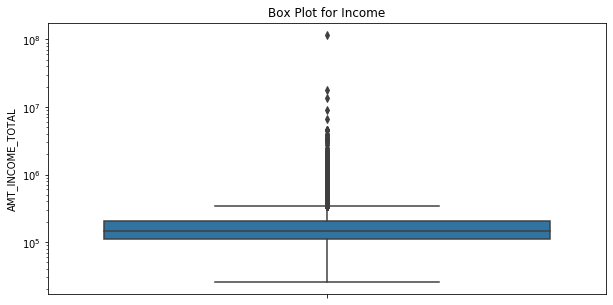

In [21]:
box_plot_univariate(df, col_name="AMT_INCOME_TOTAL",title="Box Plot for Income")

### Observations/Inferences from Income Box Plot
#### a) The mass of the boxplot lies between 1L (10^5) and 10 L(10^6)
#### b) There are many outliers ranging above upper fence till just above 10^7(1 Cr)
#### c) The third quartile is smaller than the first quartile indicating a bigger range of first quartile

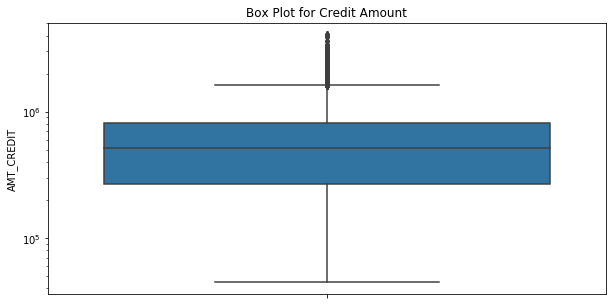

In [22]:
box_plot_univariate(df, col_name="AMT_CREDIT",title="Box Plot for Credit Amount")

### Observations/Inferences from Credit Amount Box Plot
#### a) The mass of the boxplot lies between around 5 L (5*10^5) and 10 L(10^6)
#### b) There are some outliers ranging above upper fence but not as many as income boxplot
#### c) The third quartile is smaller than the first quartile indicating a bigger range of first quartile

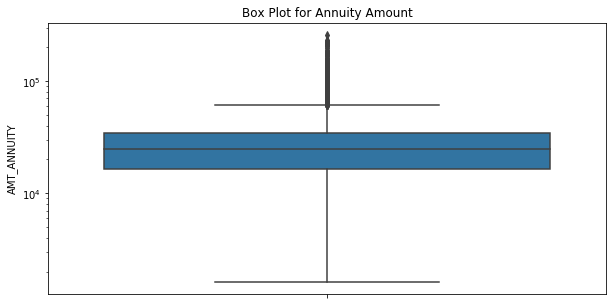

In [23]:
box_plot_univariate(df, col_name="AMT_ANNUITY",title="Box Plot for Annuity Amount")

### Observations/Inferences from Annuity Plot
#### a) The mass of the boxplot lies between 10 K(10^4) and 1 L(10^5)
#### b) There are many outliers ranging above upper fence around 1 L(10^5) but they are stacked together
#### c) The third quartile is smaller than the first quartile indicating a bigger range of first quartile

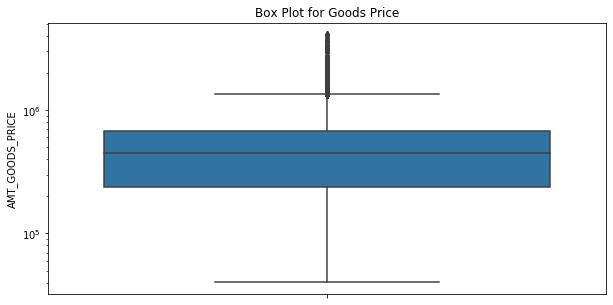

In [24]:
box_plot_univariate(df, col_name="AMT_GOODS_PRICE",title="Box Plot for Goods Price")

### Observations/Inferences from Goods Price Plot
#### a) The mass of the boxplot lies between 1 L(10^5) and 10 L(10^6)
#### b) There are many outliers ranging above upper fence around 10 L(10^6) but they are stacked together
#### c) The third quartile is smaller than the first quartile indicating a bigger range of first quartile

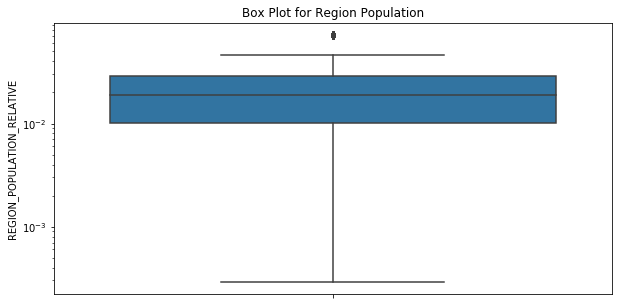

In [25]:
box_plot_univariate(df, col_name="REGION_POPULATION_RELATIVE",title="Box Plot for Region Population")

### Observations/Inferences from Region Population Plot
#### a) The mass of the boxplot lies just above 0.01(10^-2)
#### b) There are very few outliers in this case as can be seen from a small spot on the plot at the top
#### c) The third quartile is very small while the first quartile is very large

## Overall we can summarize as :
#### a) The first quartile is larger than the third quartile for all boxplots indicated that the spread is more in first quartile
#### b) Income has the highest outliers while Region popuplation has lowest outliers
#### c) The log scale boxplot was suitable for all these paramters based on nature of values

## 6. Binning 2 continuous variables

#### 6.1 Creating bins for Income amount

In [26]:
bins_income = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000000]
class_income = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','Above 500000']

df['AMT_INCOME_CLASS']=pd.cut(df['AMT_INCOME_TOTAL'],bins_income,labels=class_income)

In [27]:
df['AMT_INCOME_CLASS'].value_counts()

100000-150000    91591
150000-200000    64307
50000-100000     59181
200000-250000    48137
250000-300000    17039
300000-350000     8874
350000-400000     5802
400000-450000     4924
0-50000           4517
Above 500000      2702
450000-500000      437
Name: AMT_INCOME_CLASS, dtype: int64

#### 6.2 Creating bins for Credit amount

In [28]:
bins_credit = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000000000]
class_credit = ['0-100000', '100000-200000','200000-300000', '300000-400000', '400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000', 'Above 1000000']

df['AMT_CREDIT_CLASS']=pd.cut(df['AMT_CREDIT'],bins_credit,labels=class_credit)

In [29]:
df['AMT_CREDIT_CLASS'].value_counts()

200000-300000     54813
Above 1000000     49985
500000-600000     34232
400000-500000     32038
100000-200000     30140
300000-400000     26338
600000-700000     24049
800000-900000     21792
700000-800000     19193
900000-1000000     8927
0-100000           6004
Name: AMT_CREDIT_CLASS, dtype: int64

## 7. Analysis

### 7.1 Checking Imbalance of data

In [30]:
df["TARGET"].value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

### 92% of values are 0 while 8% is 1. This means only 8% of users default, while rest pay on time.

### 7.2 Dividing into 2 datasets based on Target values(0 & 1) 

In [31]:
df_target_0 = df.loc[df["TARGET"]==0]
df_target_1 = df.loc[df["TARGET"]==1]

### 7.3 Univariate Analysis
#### 7.3.1 Income Class

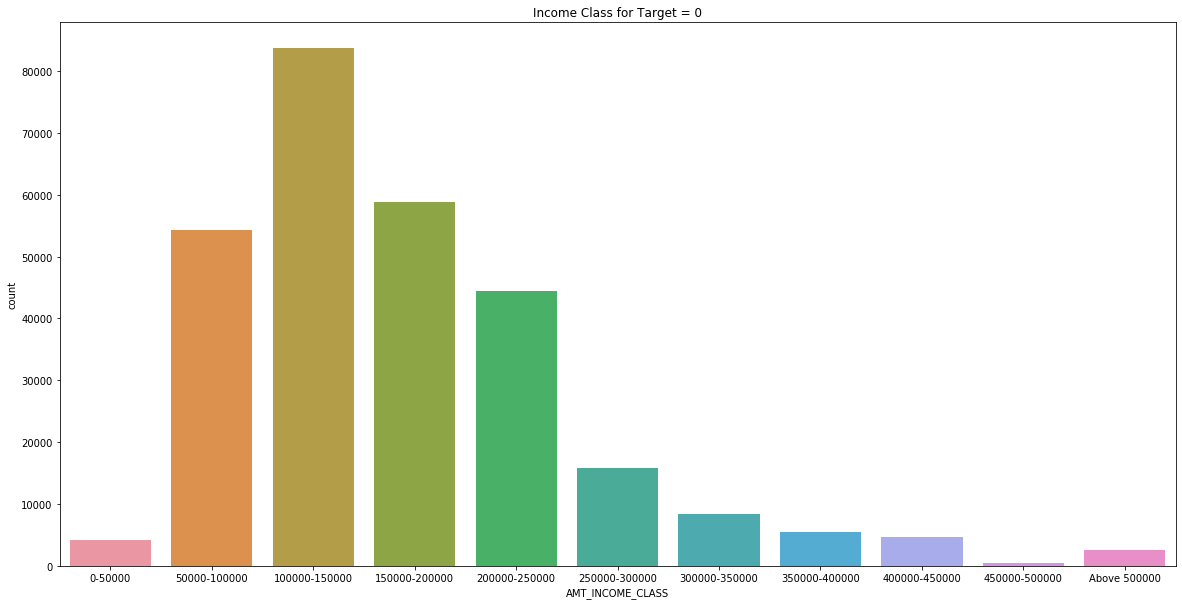

In [32]:
plt.figure(figsize=[20,10])
plt.title("Income Class for Target = 0")
sns.countplot(df_target_0["AMT_INCOME_CLASS"])

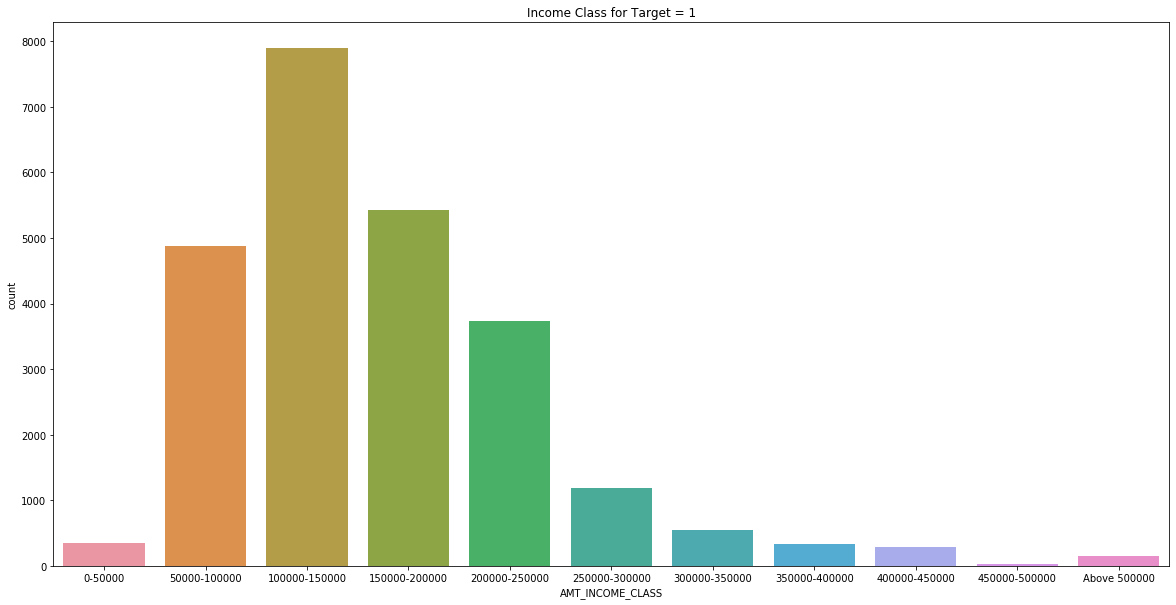

In [33]:
plt.figure(figsize=[20,10])
plt.title("Income Class for Target = 1")
sns.countplot(df_target_1["AMT_INCOME_CLASS"])

#### a) The countplot shows the income class 1-1.5 L income level has the maximum customers in both the dataframes for target =0 as well target = 1
#### b) The shape of the plots for both data frames is similar(with different frequencies) indicating that most users default also as well as pay timely in the range of (0.5 L - 2.5 L). We can also say that most customers have income in this range

#### 7.3.2 Credit Class

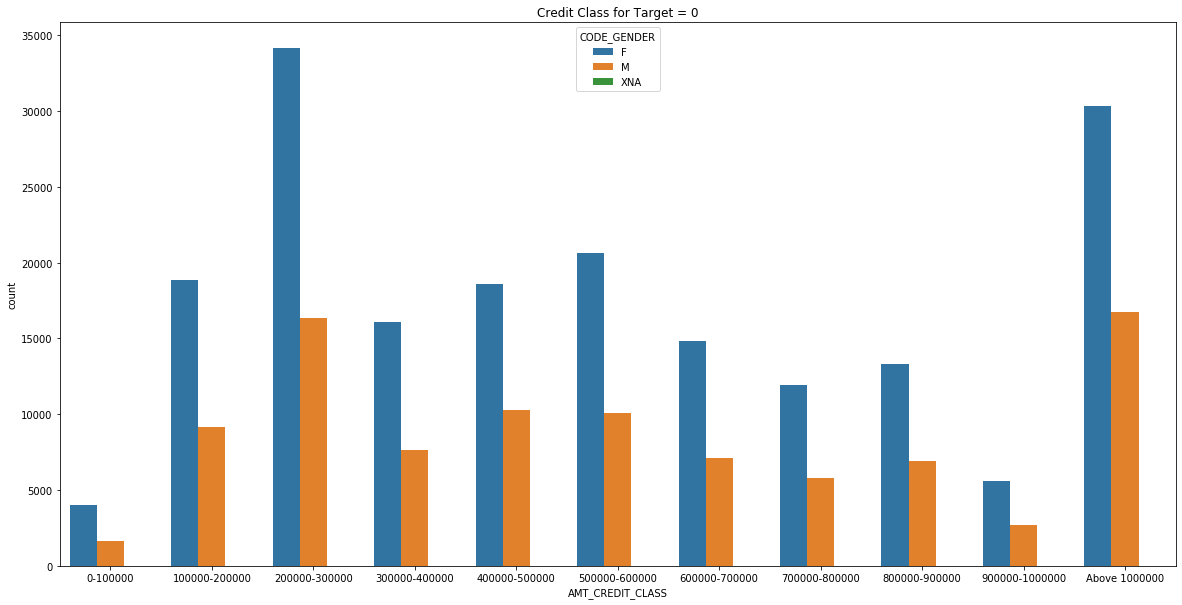

In [34]:
plt.figure(figsize=[20,10])
plt.title("Credit Class for Target = 0")
sns.countplot(df_target_0["AMT_CREDIT_CLASS"], hue=df_target_0["CODE_GENDER"])

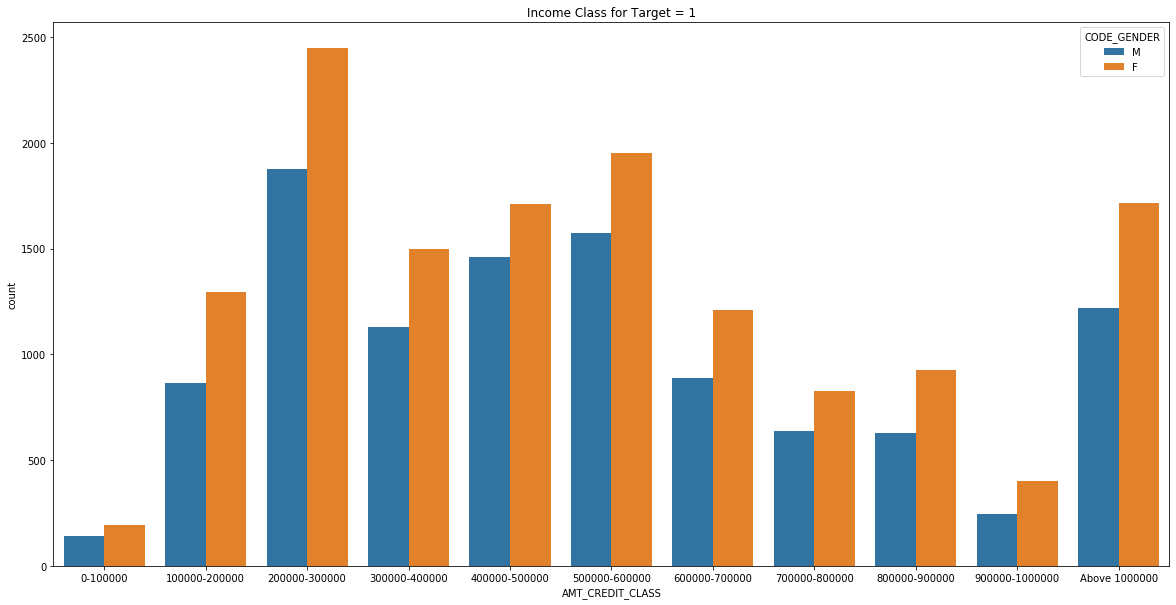

In [35]:
plt.figure(figsize=[20,10])
plt.title("Income Class for Target = 1")
sns.countplot(df_target_1["AMT_CREDIT_CLASS"], hue=df_target_1["CODE_GENDER"])

#### a) There is high defaults in 2-3L, 5-6 L & above 10 L credit classes

#### 7.3.3 Gender

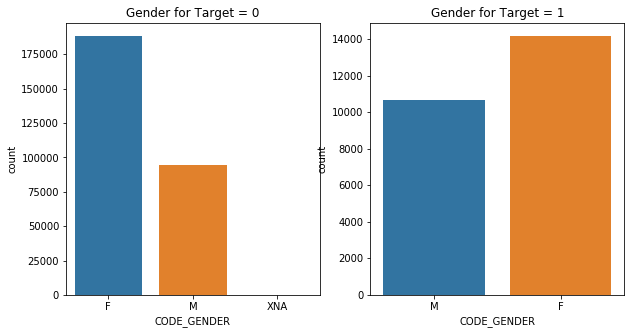

In [36]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("Gender for Target = 0")
sns.countplot(df_target_0["CODE_GENDER"])
plt.subplot(1,2,2)
plt.title("Gender for Target = 1")
sns.countplot(df_target_1["CODE_GENDER"])
plt.show()

#### a) There are high number of Females in the overall dataframe. Females are nearly twice as high as males
#### b) On first view, it seems that females default more. However, it won't be correct to say that because overall there are more females. We should loo at the ratios of females who default vs males who default for a better picture

#### 7.3.4 Name Contract Type

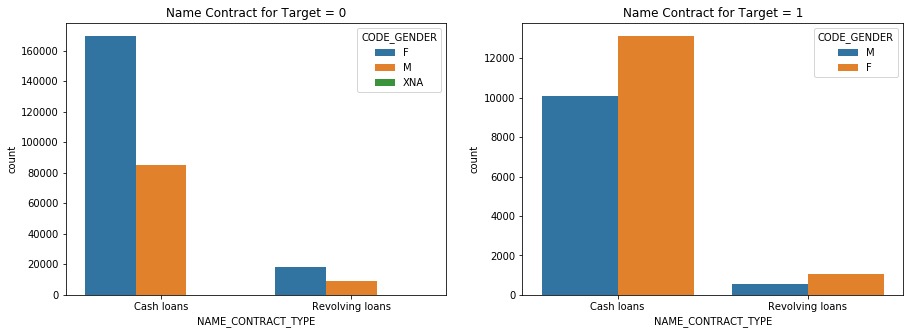

In [37]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("Name Contract for Target = 0")
sns.countplot(df_target_0["NAME_CONTRACT_TYPE"], hue=df_target_0["CODE_GENDER"])
plt.subplot(1,2,2)
plt.title("Name Contract for Target = 1")
sns.countplot(df_target_1["NAME_CONTRACT_TYPE"], hue=df_target_1["CODE_GENDER"])
plt.show()

#### a) Most Loans are cash loans
#### b) More Females are taking credits

#### 7.3.5 Name Income Type

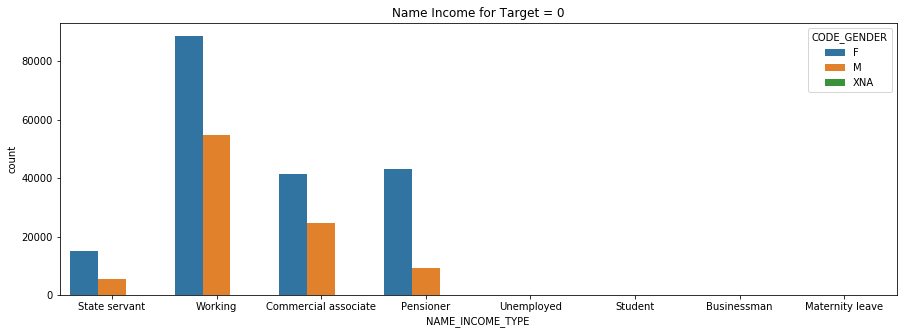

In [38]:
plt.figure(figsize=[15,5])
plt.title("Name Income for Target = 0")
sns.countplot(df_target_0["NAME_INCOME_TYPE"], hue=df_target_0["CODE_GENDER"])
plt.show()

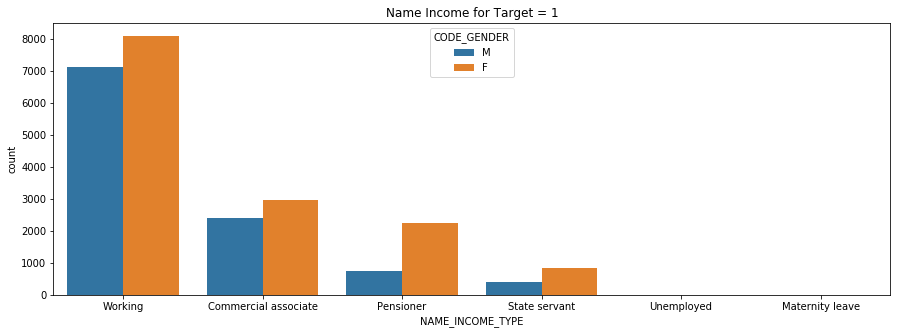

In [39]:
plt.figure(figsize=[15,5])
plt.title("Name Income for Target = 1")
sns.countplot(df_target_1["NAME_INCOME_TYPE"], hue=df_target_1["CODE_GENDER"])
plt.show()

#### a) Working professionals are taking the most loans
#### b) Female defaulters in pensioner category as very high as compared to males (with respect to all categories of income types)
#### c) Unemployed, students, Businessman, Maternity leave categories take almost negligible loans 

### 7.4 Correlation for continuous variables

In [40]:
df_target_0.iloc[0:,2:].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-200000
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100000-150000,300000-400000
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-150000,500000-600000
5,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,400000-500000


In [41]:
numeric_cols = []
df_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100000-150000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-150000,500000-600000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,400000-500000


In [42]:

numeric_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
df_target_0_corr = df_target_0[numeric_columns].corr()

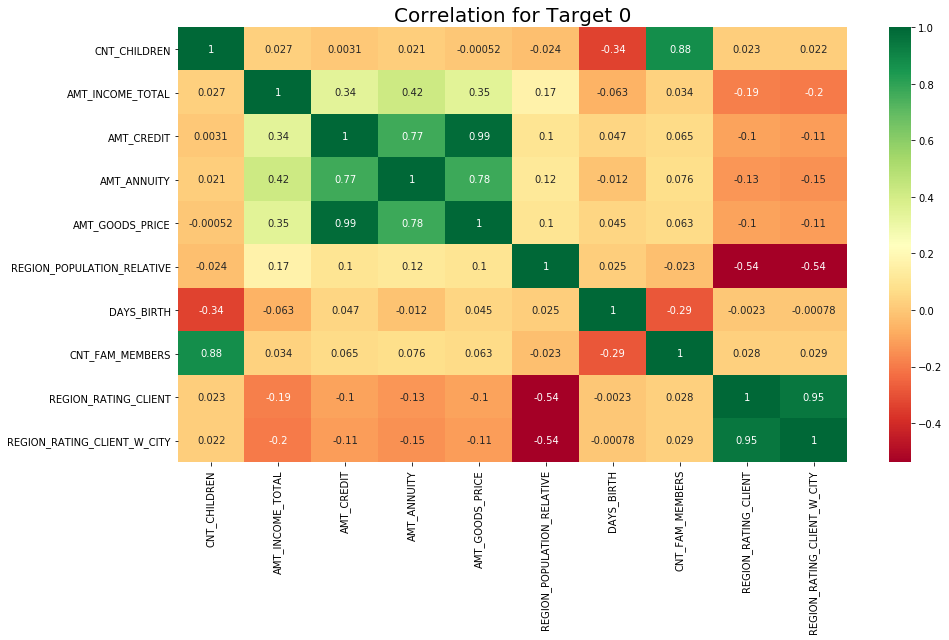

In [43]:
plt.figure(figsize=[15,8])
plt.title("Correlation for Target 0", fontsize = 20)
sns.heatmap(df_target_0_corr, cmap="RdYlGn",annot=True)
plt.show()

#### a) Income amount is positively correlated with credit taken
#### b) Children count is inversely correlated with age
#### c) Overall there is no strong correlation between other parameters considered

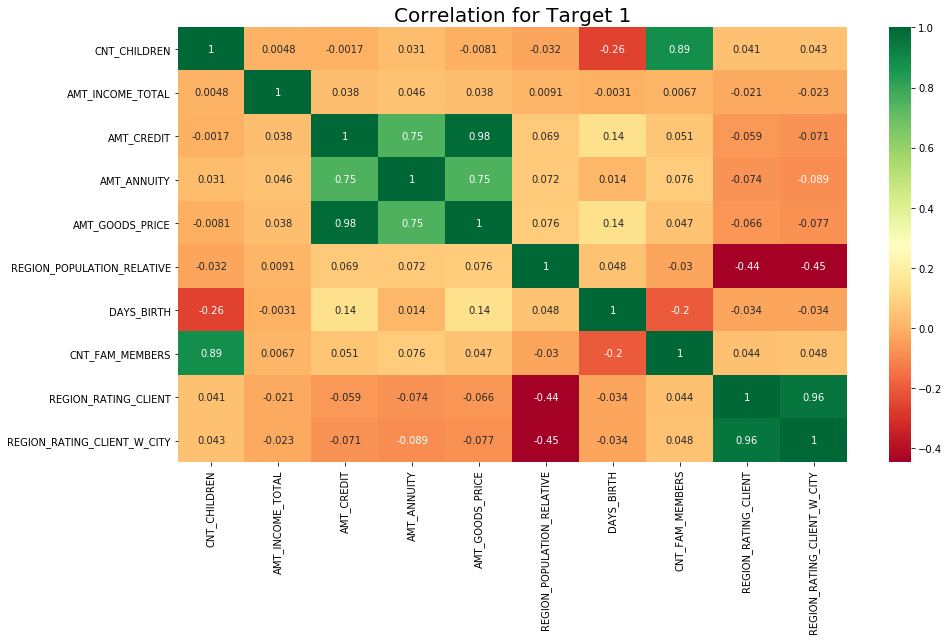

In [44]:
df_target_1_corr = df_target_1[numeric_columns].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation for Target 1", fontsize = 20)
sns.heatmap(df_target_1_corr, cmap="RdYlGn",annot=True)
plt.show()

#### There is not much difference between these parameters when Target = 1. Its similar to when Target = 0

### 7.5 Bivariate Analysis

#### 7.5.1 Categorical - Continuous analysis

In [45]:
# Creating function for boxplot
def boxplot_bivariate(col1,col2,title1, title2):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.yscale('log')
    plt.title(title1)
    plt.xticks(rotation=45)
    sns.boxplot(data =df_target_0, x=col1,y=col2,orient='v')
    plt.subplot(1,2,2)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.title(title2)
    sns.boxplot(data =df_target_1, x=col1,y=col2,orient='v')
    plt.show()

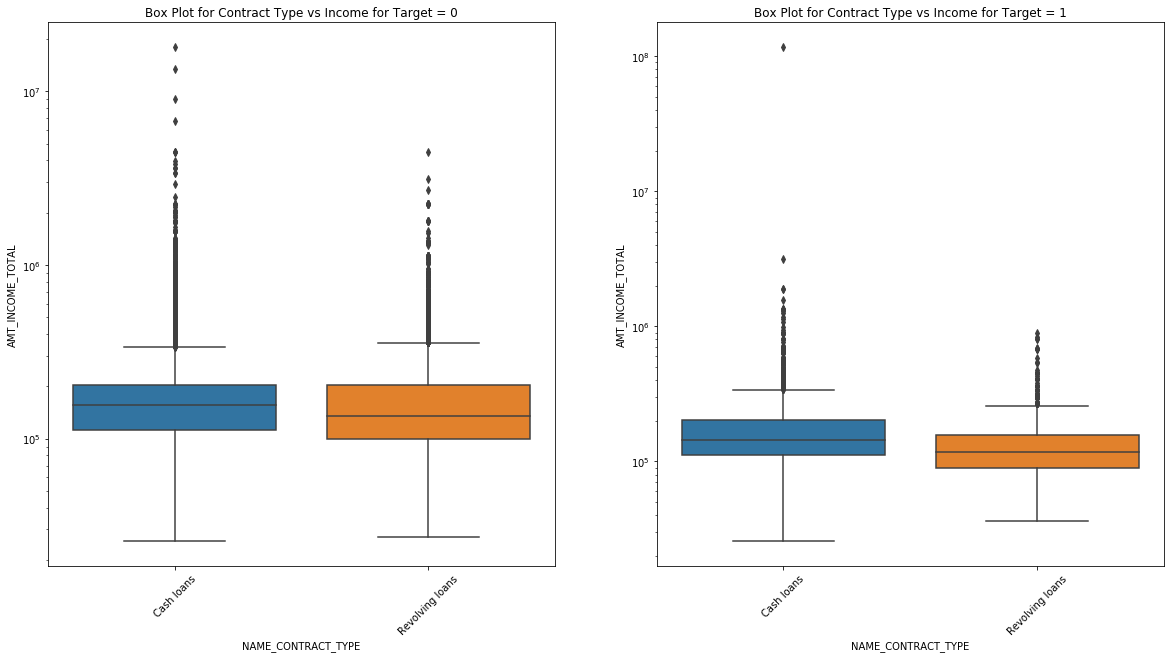

In [46]:
#Contract Type vs Income
boxplot_bivariate("NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL", "Box Plot for Contract Type vs Income for Target = 0","Box Plot for Contract Type vs Income for Target = 1")

#### a) For target = 1, the income boxplot is much smaller than for target = 0. This indicates that for customer having payment difficulties, the income range is concentrated to a smaller range.
#### b) For both type of loans, cash as well as revolving, we can see that the outliers are less for target = 1
#### c) The median income of customers taking cash loan is slightly higher than that of customers taking revolving loans

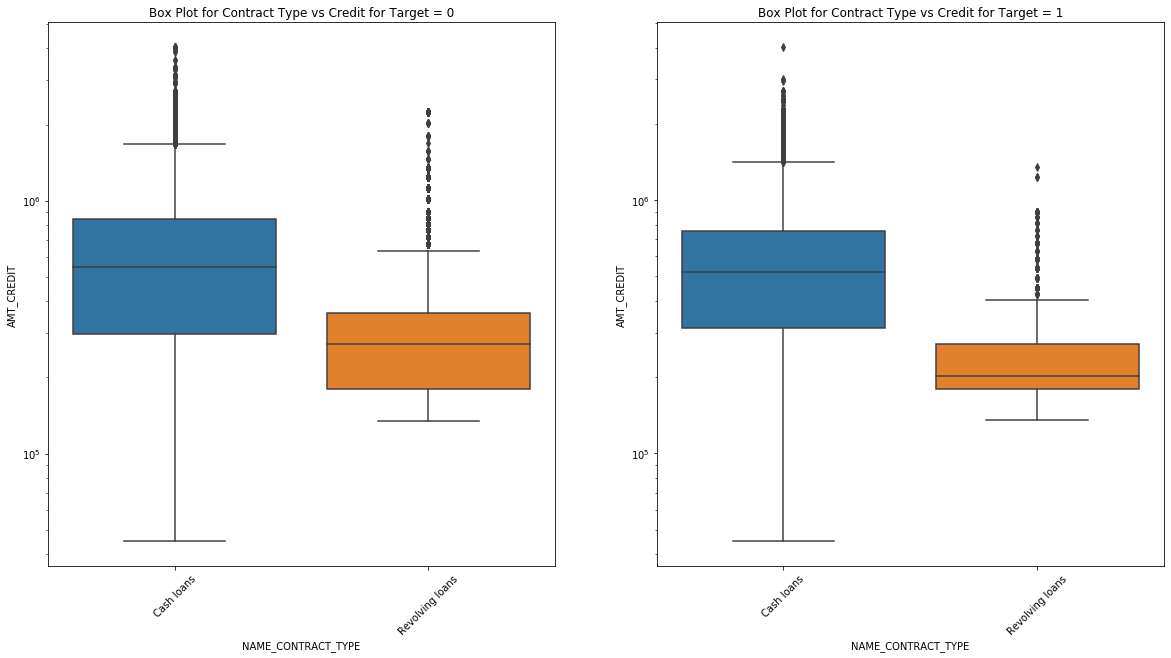

In [47]:
#Contract Type vs Credit
boxplot_bivariate("NAME_CONTRACT_TYPE","AMT_CREDIT", "Box Plot for Contract Type vs Credit for Target = 0","Box Plot for Contract Type vs Credit for Target = 1")

#### a) The credit for cash loans for both target = 0 & 1 is quite similar.
#### b) However we can see that for median credit for revolving loans is much lower than that of cash loans
#### c) Also, the boxplot for revolving loan is much compact as compared to cash loans which has a high range

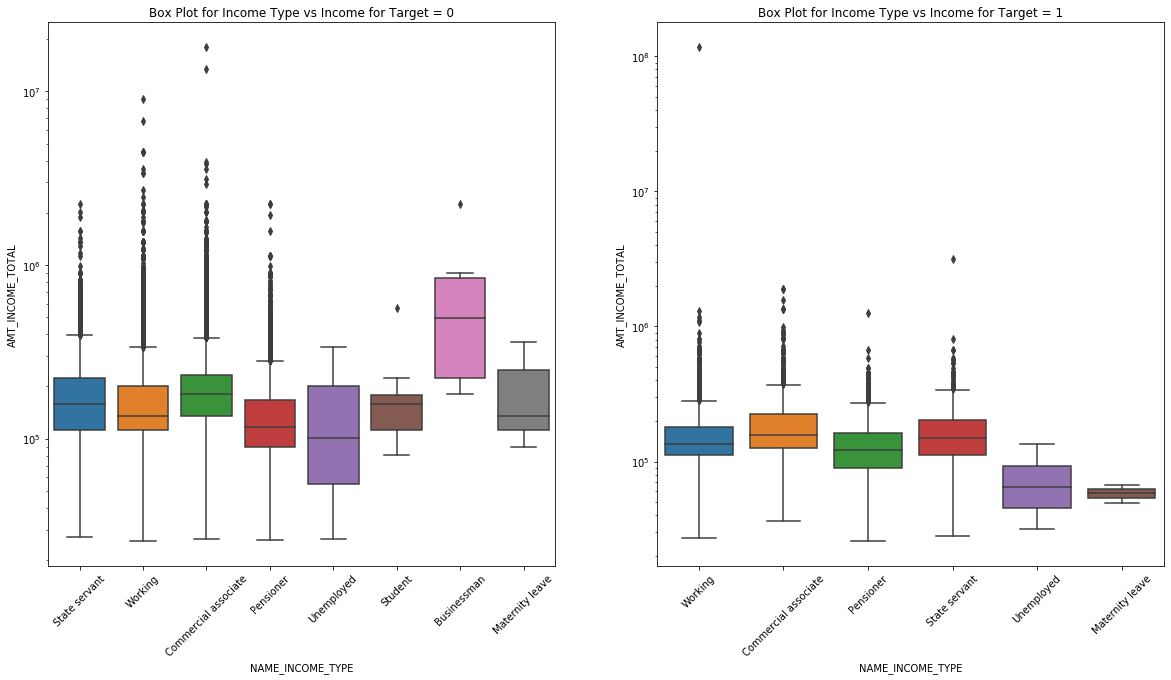

In [48]:
#Income Type vs Income
boxplot_bivariate("NAME_INCOME_TYPE","AMT_INCOME_TOTAL", "Box Plot for Income Type vs Income for Target = 0","Box Plot for Income Type vs Income for Target = 1")

#### a) Income types unemployed, students, businessman, maternity leave have very low or no outliers for income distribution.
#### b) For state servants, pensioners, unemployed & maternity leave, customers wiith lower income tend to have more payment difficulties as compared customers with higher income which can be seen from median & boxplot of target =0 & 1

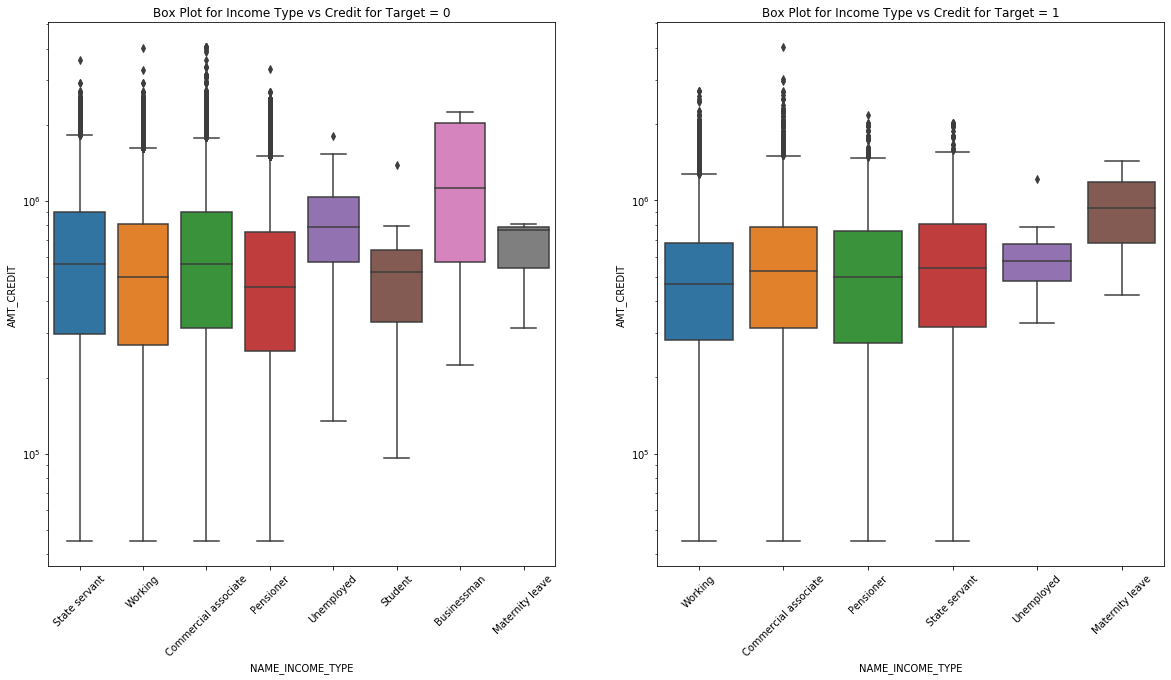

In [49]:
#Income Type vs Credit
boxplot_bivariate("NAME_INCOME_TYPE","AMT_CREDIT", "Box Plot for Income Type vs Credit for Target = 0","Box Plot for Income Type vs Credit for Target = 1")

#### a) Customers on maternity leave taking high credit(median 10 L) have more problems in payment
#### b) The boxplot for Unemployed customers having problem in payment is very compact

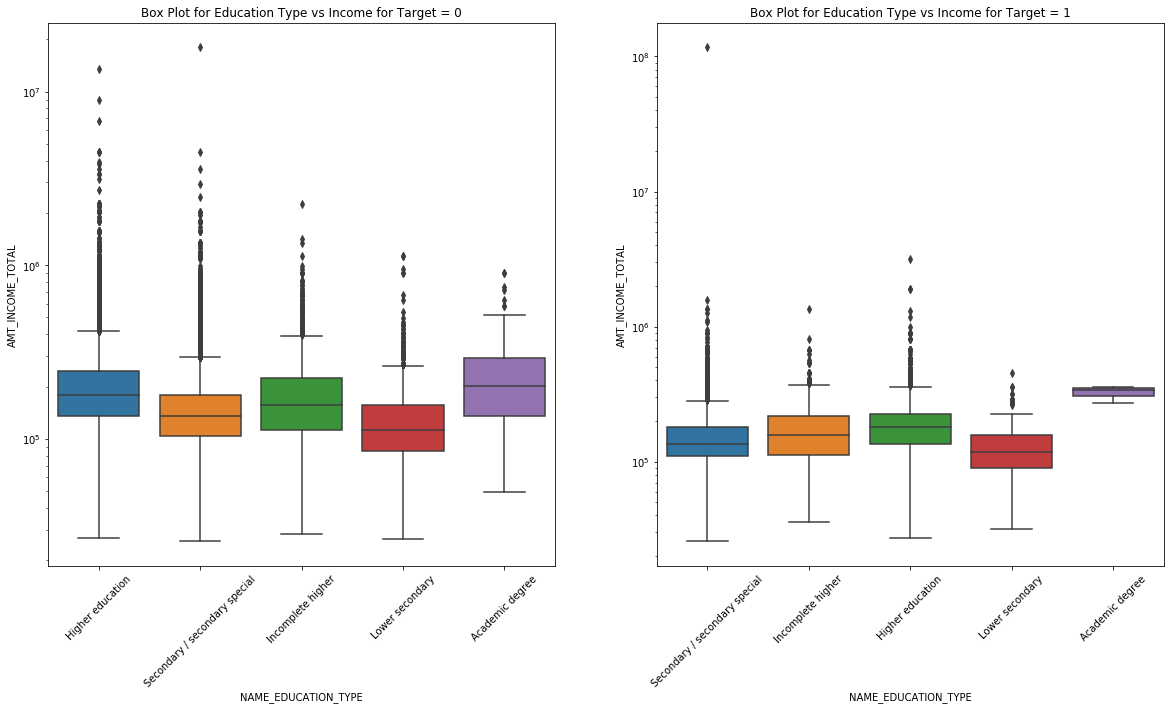

In [50]:
#Education Type vs Income
boxplot_bivariate("NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL", "Box Plot for Education Type vs Income for Target = 0","Box Plot for Education Type vs Income for Target = 1")

#### a) In general, all education types with income greater than 10 L don't face payment difficulties
#### b) The boxplot for academic degree is very small which means those customer hardly(very small segment) have payment difficulties

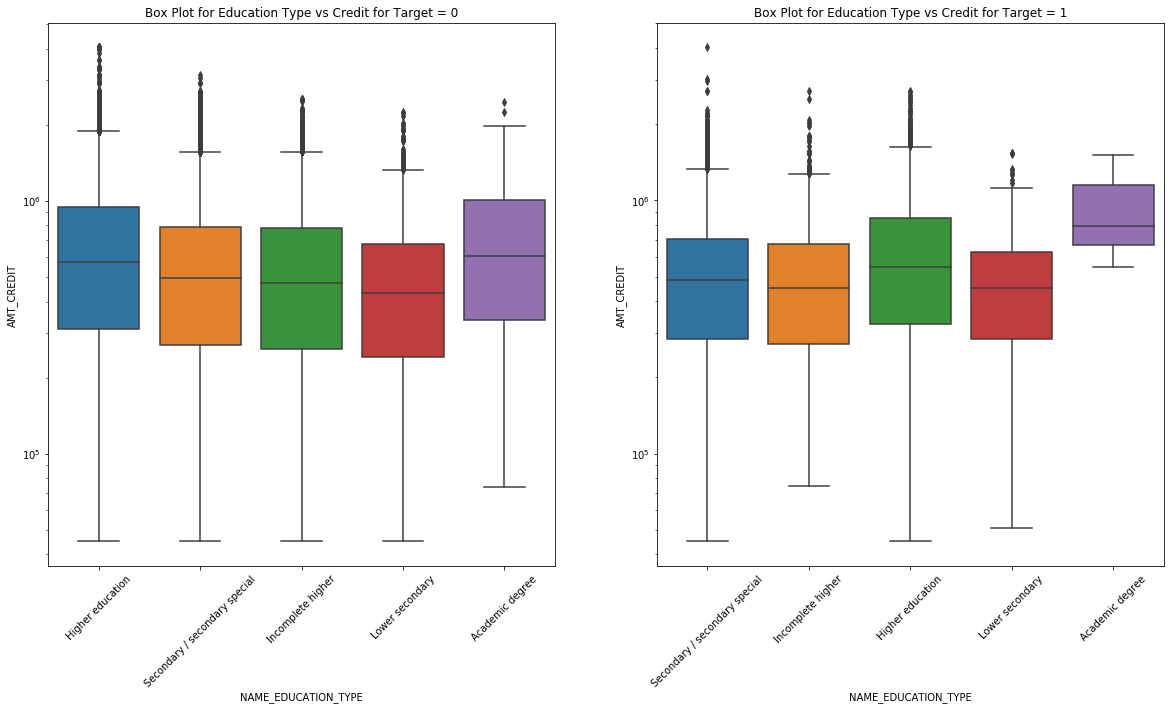

In [51]:
#Education Type vs Credit
boxplot_bivariate("NAME_EDUCATION_TYPE","AMT_CREDIT", "Box Plot for Education Type vs Credit for Target = 0","Box Plot for Education Type vs Credit for Target = 1")

#### a) Again it seems that academic degree customers are the best ones to target the people who have payment difficulties have a very small boxplot

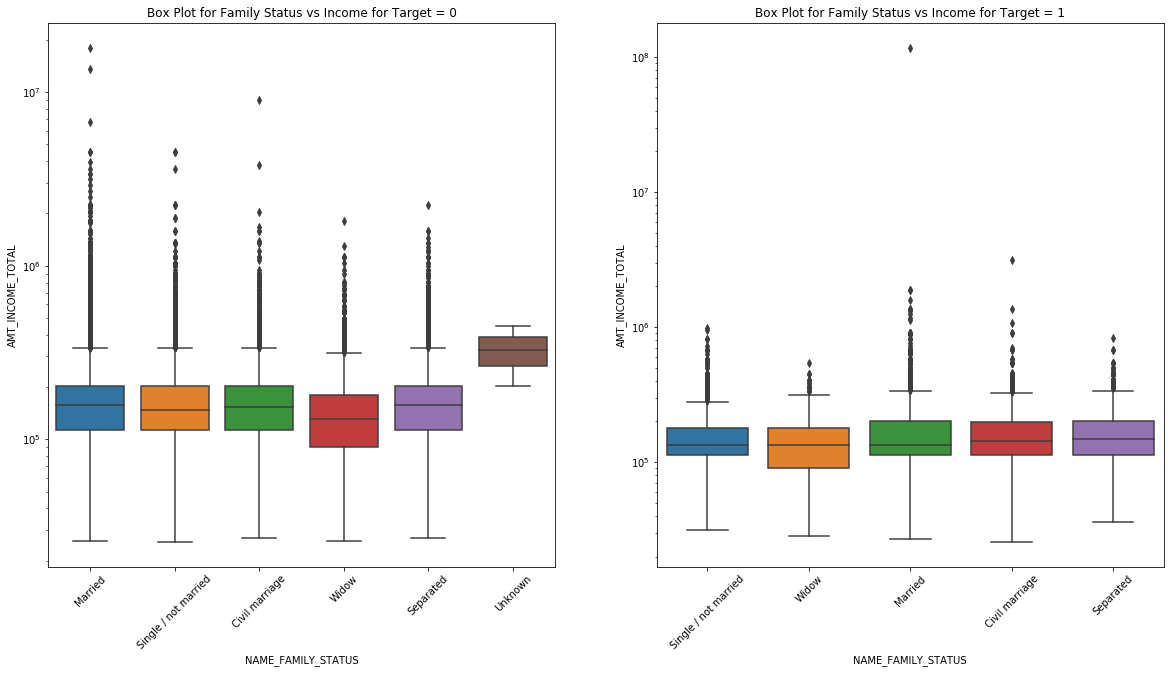

In [52]:
#Family Status vs Income
boxplot_bivariate("NAME_FAMILY_STATUS","AMT_INCOME_TOTAL", "Box Plot for Family Status vs Income for Target = 0","Box Plot for Family Status vs Income for Target = 1")

#### a) There are lower outliers based on income & family status for customers who have payment difficulties as compared to customer who don't have payment difficulties which have higher outliers

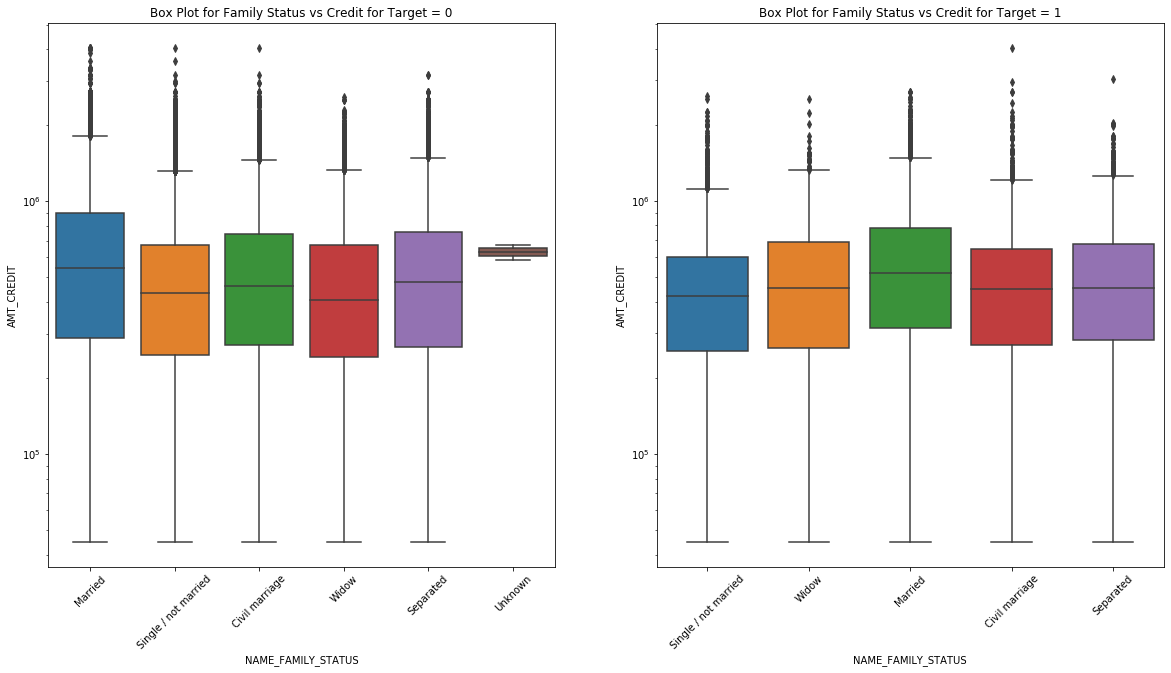

In [53]:
#Family Status vs Credit
boxplot_bivariate("NAME_FAMILY_STATUS","AMT_CREDIT", "Box Plot for Family Status vs Credit for Target = 0","Box Plot for Family Status vs Credit for Target = 1")

#### a) No conclusive observations from the above boxplot


In [54]:
# Creating function for boxplot
def scatterplot_bivariate(col1,col2,title1, title2):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.title(title1)
    plt.xticks(rotation=45)
    sns.scatterplot(data =df_target_0, x=col1,y=col2)
    plt.subplot(1,2,2)
    plt.xticks(rotation=45)
    plt.title(title2)
    sns.scatterplot(data =df_target_1, x=col1,y=col2)
    plt.show()

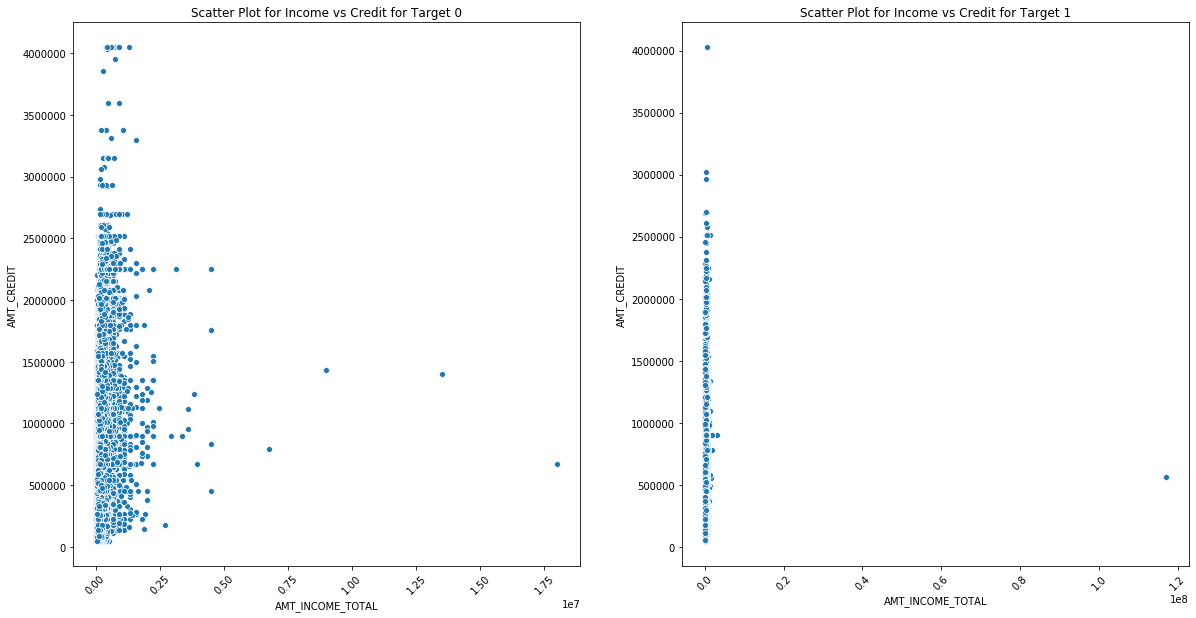

In [55]:
#Income vs Credit
scatterplot_bivariate("AMT_INCOME_TOTAL","AMT_CREDIT", "Scatter Plot for Income vs Credit for Target 0", "Scatter Plot for Income vs Credit for Target 1")

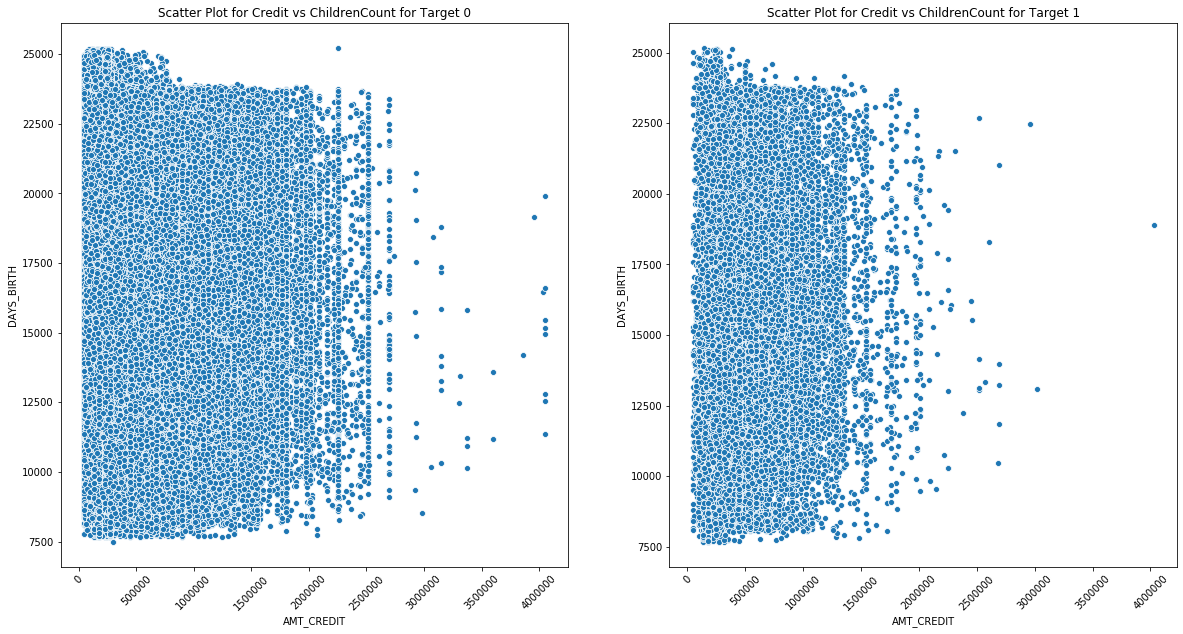

In [56]:
scatterplot_bivariate("AMT_CREDIT","DAYS_BIRTH", "Scatter Plot for Credit vs ChildrenCount for Target 0", "Scatter Plot for Credit vs ChildrenCount for Target 1")

### 7.5.2 Analysing based on Target variable in original application file

In [57]:
df["TARGET"].value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

### 8% of total users have defaulted in application file

In [58]:
df.groupby('NAME_CONTRACT_TYPE')["TARGET"].mean()*100

NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64

In [59]:
df.groupby('CODE_GENDER')["TARGET"].mean()*100

CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64

In [60]:
df.groupby('NAME_TYPE_SUITE')["TARGET"].mean()*100

NAME_TYPE_SUITE
Children           7.376798
Family             7.494583
Group of people    8.487085
Other_A            8.775982
Other_B            9.830508
Spouse, partner    7.871592
Unaccompanied      8.183047
Name: TARGET, dtype: float64

In [61]:
df.groupby('NAME_INCOME_TYPE')["TARGET"].mean()*100

NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484257
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64

In [62]:
df.groupby('NAME_EDUCATION_TYPE')["TARGET"].mean()*100

NAME_EDUCATION_TYPE
Academic degree                   1.829268
Higher education                  5.355115
Incomplete higher                 8.484966
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Name: TARGET, dtype: float64

In [63]:
df.groupby('NAME_FAMILY_STATUS')["TARGET"].mean()*100

NAME_FAMILY_STATUS
Civil marriage          9.944584
Married                 7.559868
Separated               8.194234
Single / not married    9.807675
Unknown                 0.000000
Widow                   5.824217
Name: TARGET, dtype: float64

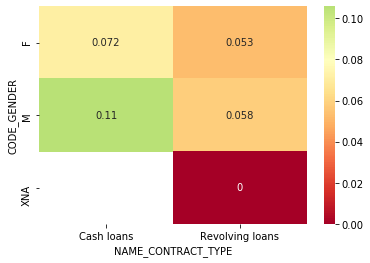

In [64]:
#create heat map of contract type vs gender vs target
res = pd.pivot_table(data=df, index='CODE_GENDER', columns='NAME_CONTRACT_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

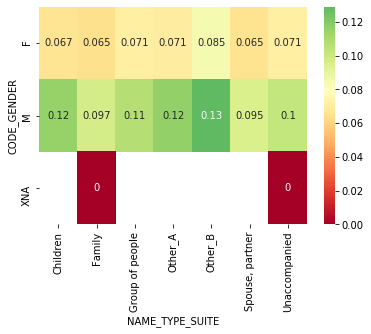

In [65]:
#create heat map of Suite type vs gender vs target
res = pd.pivot_table(data=df, index='CODE_GENDER', columns='NAME_TYPE_SUITE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

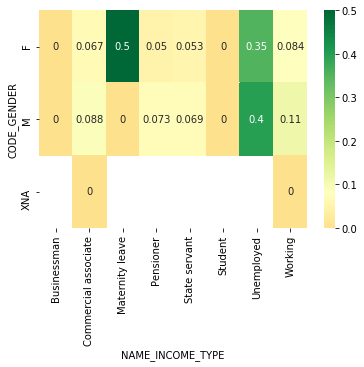

In [66]:
#create heat map of income type vs gender vs target
res = pd.pivot_table(data=df, index='CODE_GENDER', columns='NAME_INCOME_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

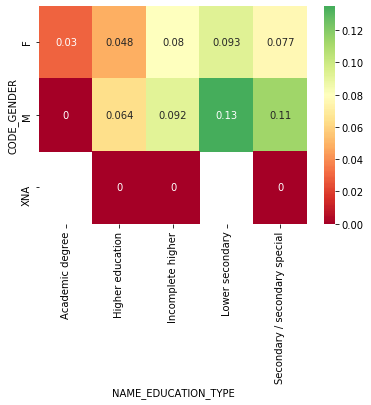

In [67]:
#create heat map of education type vs gender vs target
res = pd.pivot_table(data=df, index='CODE_GENDER', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

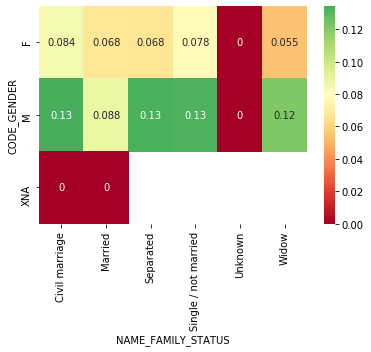

In [68]:
#create heat map of family status vs gender vs target
res = pd.pivot_table(data=df, index='CODE_GENDER', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

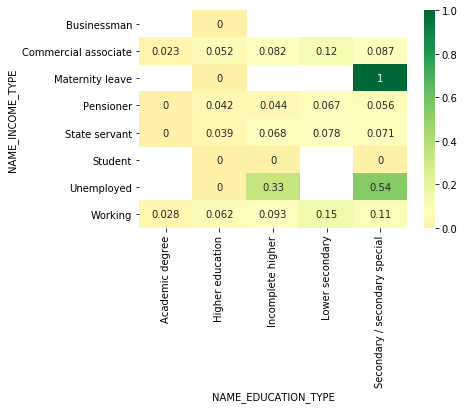

In [69]:
#create heat map of income type vs education type vs target
res = pd.pivot_table(data=df, index='NAME_INCOME_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

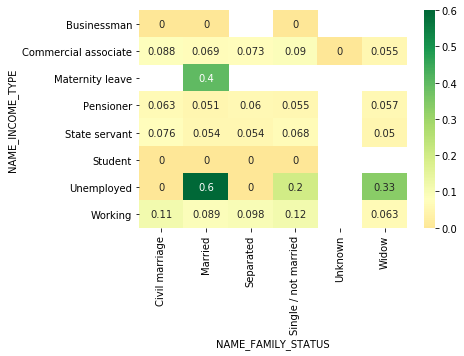

In [70]:
#create heat map of income type vs family status vs target
res = pd.pivot_table(data=df, index='NAME_INCOME_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

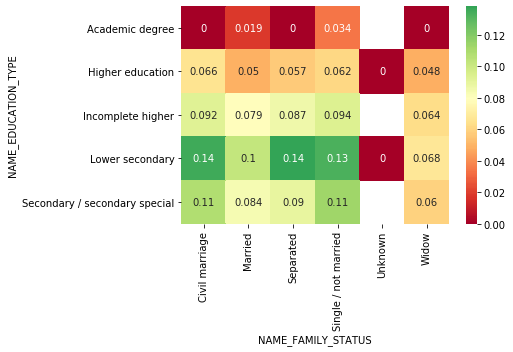

In [71]:
#create heat map of education type vs family status vs target
res = pd.pivot_table(data=df, index='NAME_EDUCATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

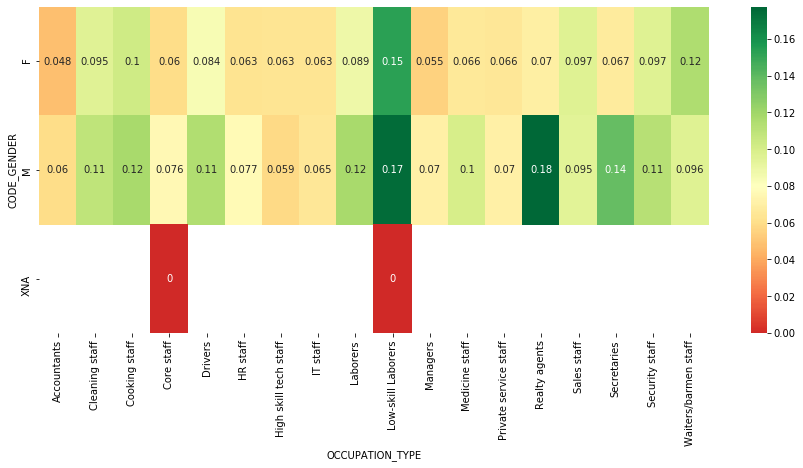

In [72]:
#create heat map of gender vs occupation type vs target
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df, index='CODE_GENDER', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

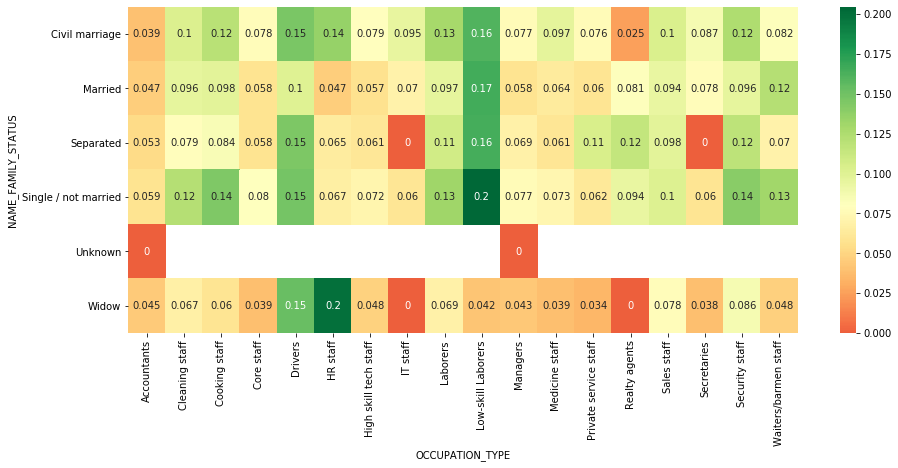

In [73]:
#create heat map of family status vs occupation type vs target
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df, index='NAME_FAMILY_STATUS', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

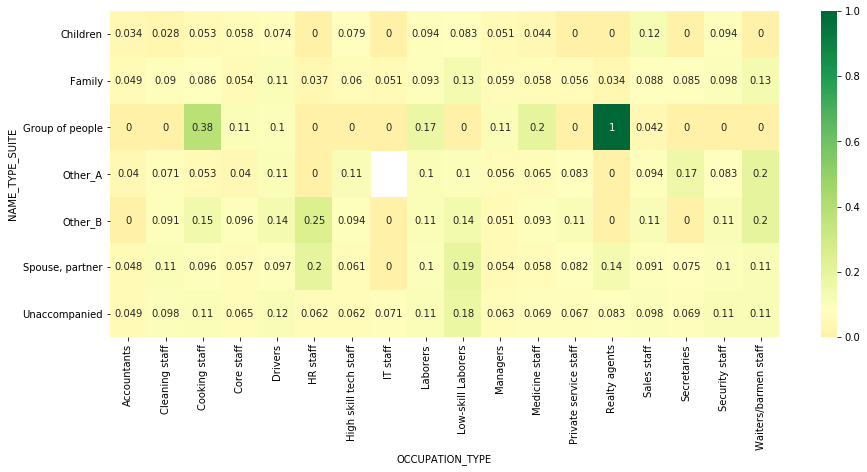

In [74]:
#create heat map of family status vs occupation type vs target
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df, index='NAME_TYPE_SUITE', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.08)
plt.show()

## 8. Merging application & previous application files for analysis

In [75]:
df_prev = pd.read_csv("previous_application.csv")
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_prev.shape

(1670214, 37)

In [77]:
df_final=pd.merge(left=df,right=df_prev,how='inner',on='SK_ID_CURR',suffixes='_x')

In [78]:
#Renaming columns in appl & prev_appl files
df_final_1 = df_final.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','AMT_GOODS_PRICE_':'AMT_GOODS_PRICE','NAME_TYPE_SUITE_':'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV','AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV','WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV','NAME_TYPE_SUITEx':'NAME_TYPE_SUITE_PREV','HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [79]:
df_final_1.shape

(1413701, 111)

### Shape after merging both files & renaming columns with correct names is (1413701, 111)

In [80]:
df_final_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,400000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,

In [81]:
df_final_1.dtypes

SK_ID_CURR                            int64
TARGET                                int64
NAME_CONTRACT_TYPE                   object
CODE_GENDER                          object
FLAG_OWN_CAR                         object
FLAG_OWN_REALTY                      object
CNT_CHILDREN                          int64
AMT_INCOME_TOTAL                    float64
AMT_CREDIT                          float64
AMT_ANNUITY                         float64
AMT_GOODS_PRICE                     float64
NAME_TYPE_SUITE                      object
NAME_INCOME_TYPE                     object
NAME_EDUCATION_TYPE                  object
NAME_FAMILY_STATUS                   object
NAME_HOUSING_TYPE                    object
REGION_POPULATION_RELATIVE          float64
DAYS_BIRTH                            int64
DAYS_EMPLOYED                         int64
DAYS_REGISTRATION                   float64
DAYS_ID_PUBLISH                       int64
FLAG_MOBIL                            int64
FLAG_EMP_PHONE                  

In [82]:
df_final_1["TARGET"].value_counts(normalize = True)*100

0    91.344704
1     8.655296
Name: TARGET, dtype: float64

### There are around 8.6% target values = 1 in merged file while there were around 8% in application file

### 8.1 Impact of Gender on defaults

In [83]:
df_final_1.groupby('CODE_GENDER')["TARGET"].mean()*100

CODE_GENDER
F       7.625696
M      10.801144
XNA     0.000000
Name: TARGET, dtype: float64

### Males tend to default more as compared to females

### 8.2 Impact of income type on defaults

In [84]:
df_final_1.groupby('NAME_INCOME_TYPE')["TARGET"].mean()*100

NAME_INCOME_TYPE
Commercial associate      8.114010
Maternity leave         100.000000
Pensioner                 5.833796
State servant             6.411506
Student                   0.000000
Unemployed               54.471545
Working                  10.244597
Name: TARGET, dtype: float64

### a) Unemployed customers & customers on maternity pose the highest risks. We should avoid targeting them for loans.
### b) Students, Pensioner & state servants are the best segments to target
### c) Working customers should be carefully checked for any parameter before making a decision to grant loan

### 8.3 Impact of education type on defaults

In [85]:
df_final_1.groupby('NAME_EDUCATION_TYPE')["TARGET"].mean()*100

NAME_EDUCATION_TYPE
Academic degree                   1.727116
Higher education                  6.048682
Incomplete higher                 8.984539
Lower secondary                  10.877418
Secondary / secondary special     9.393758
Name: TARGET, dtype: float64

### a) Customers with academic degree & higher education are the best segments to target
### b) Customer with lower secondary education should be avoided or carefully checked for other parameters

### 8.4 Impact of family status on defaults

In [86]:
df_final_1.groupby('NAME_FAMILY_STATUS')["TARGET"].mean()*100

NAME_FAMILY_STATUS
Civil marriage          10.313851
Married                  8.342317
Separated                8.486063
Single / not married    10.158740
Widow                    5.991009
Name: TARGET, dtype: float64

### a) Customers with civil marriage or single/unmarried should be avoided or carefully checked for other parameters

### 8.5 Impact of housing type on defaults

In [87]:
df_final_1.groupby('NAME_HOUSING_TYPE')["TARGET"].mean()*100

NAME_HOUSING_TYPE
Co-op apartment         8.452951
House / apartment       8.376602
Municipal apartment     9.465779
Office apartment        7.219111
Rented apartment       12.554966
With parents           12.727627
Name: TARGET, dtype: float64

### a) Customers who live in rented apartments or with parents should be avoided or carefully checked for other parameters

### 8.6 Impact of occupation type on defaults

In [88]:
df_final_1.groupby('OCCUPATION_TYPE')["TARGET"].mean()*100

OCCUPATION_TYPE
Accountants               5.739072
Cleaning staff            9.248602
Cooking staff            10.934345
Core staff                6.847775
Drivers                  12.043965
HR staff                  7.349762
High skill tech staff     6.979766
IT staff                  6.870229
Laborers                 11.204979
Low-skill Laborers       19.098712
Managers                  7.130744
Medicine staff            7.547689
Private service staff     6.389933
Realty agents            10.073363
Sales staff               9.968419
Secretaries               8.016731
Security staff           11.699577
Waiters/barmen staff     10.909980
Name: TARGET, dtype: float64

### a) Accountants, high skilled tech & IT staff, HR staff, Managers, private service staff are the best customers to target
### b) Cooking staff, drivers, laborers, low-skilled, security staff & waiters should be avoided

### 8.7 Analyzing Previous application status

In [89]:
df_final_1["NAME_CONTRACT_STATUS"].value_counts(normalize = True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

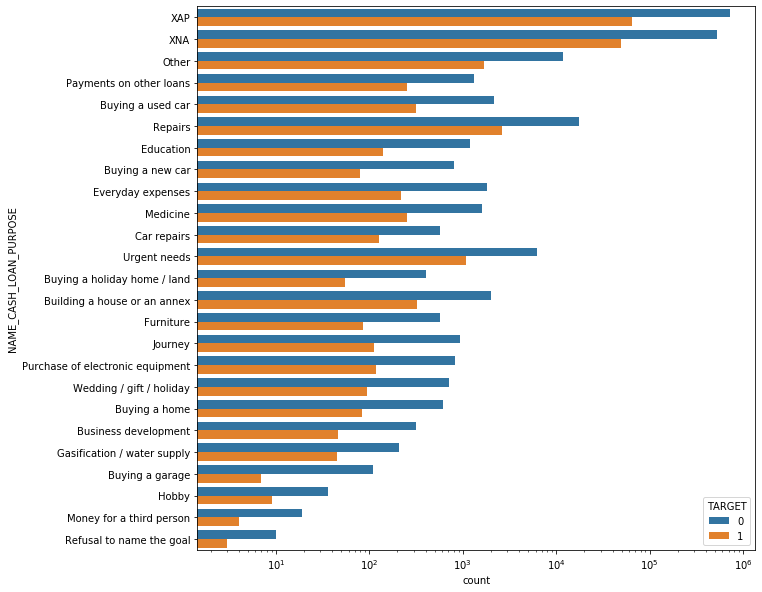

In [90]:
plt.figure(figsize=[10,10])
plt.xscale('log')
sns.countplot(data = df_final_1, y= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET')
plt.show()

### Loans for repairs & urgent needs seems to have more defaulters 

### 8.8 Impact of Contract Type

In [91]:
df_final_1.groupby('NAME_CONTRACT_TYPE')["TARGET"].mean()*100

NAME_CONTRACT_TYPE
Cash loans         8.914977
Revolving loans    5.470700
Name: TARGET, dtype: float64

### Cash loans have more defaulters

### 8.9 Heat map analysis based target parameter value

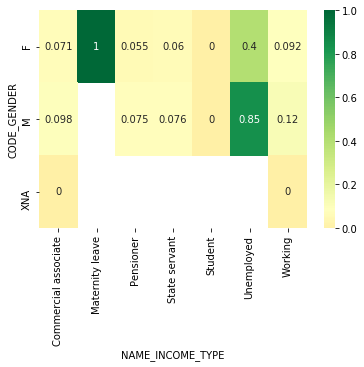

In [92]:
#create heat map of income type vs gender vs target
res = pd.pivot_table(data=df_final_1, index='CODE_GENDER', columns='NAME_INCOME_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### It is advisable to avoid giving loans to customers who are unemployed or on maternity leave

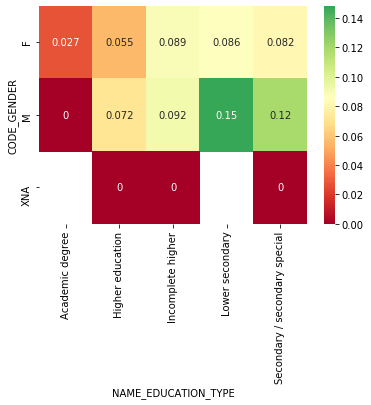

In [93]:
res = pd.pivot_table(data=df_final_1, index='CODE_GENDER', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### In general, it seems like higher education level customers are less likely to have payment difficulties. While specially we should avoid males with lower secondary or secondary education

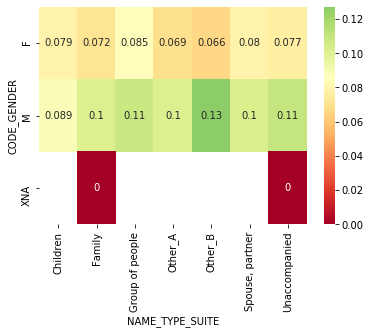

In [94]:
res = pd.pivot_table(data=df_final_1, index='CODE_GENDER', columns='NAME_TYPE_SUITE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### In general, males are riskier than females. Males specially of Other categories or group should be avoided

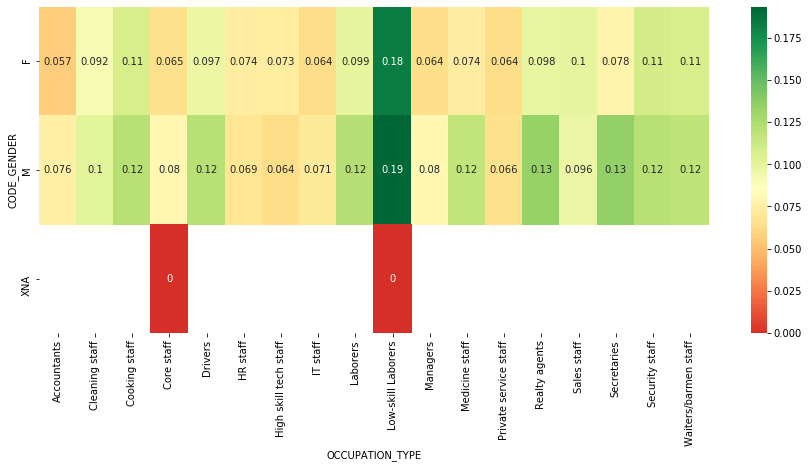

In [95]:
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df_final_1, index='CODE_GENDER', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### a) Low skill laborers should be strictly not granted loans
### b) Cleaning staff, Cooking staff, drivers, laborers, realty agents, security staff & waiter/barmens have higher than normal rates of facing problems while repaying loans

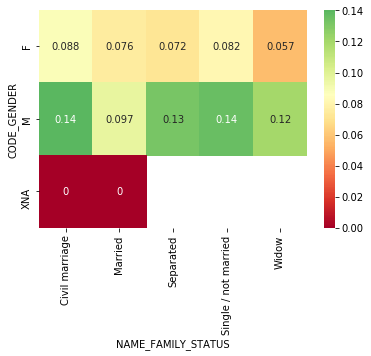

In [96]:
res = pd.pivot_table(data=df_final_1, index='CODE_GENDER', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### a) In case of males, only married males are somewhat less riskier while all males with other family status categories are high risks & should be avoided.

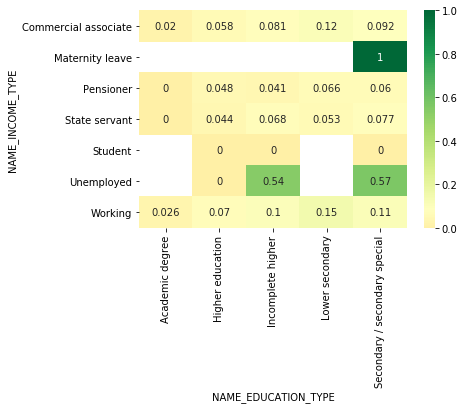

In [97]:
res = pd.pivot_table(data=df_final_1, index='NAME_INCOME_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### a) Customers on maternity leave should be strictly avoided
### b) Unemployed customers with incompete higher education or secondary education should be strictly avoided

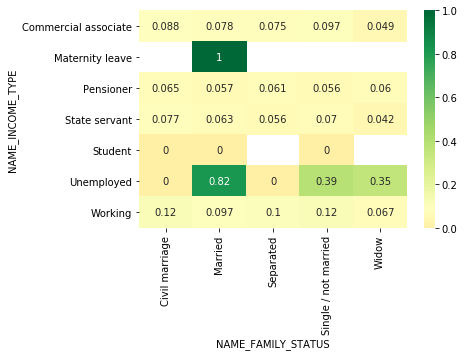

In [98]:
res = pd.pivot_table(data=df_final_1, index='NAME_INCOME_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### a) Unemployed customers who are married, single/not married or widow should be strictly avoided

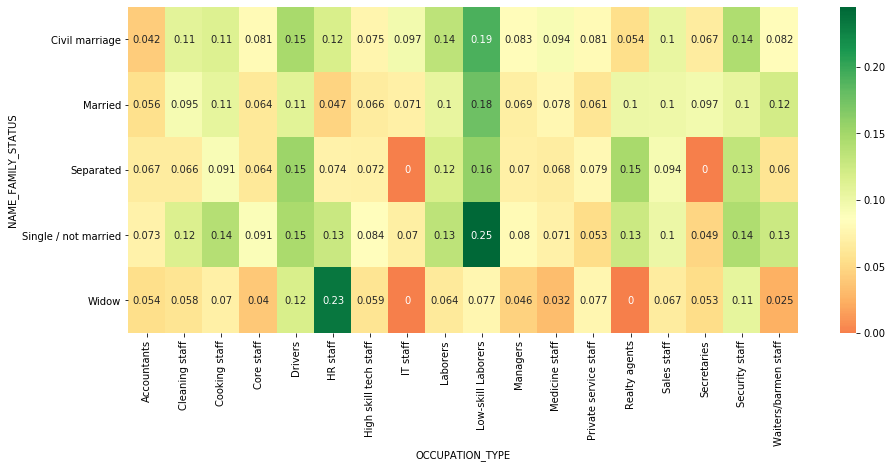

In [99]:
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df_final_1, index='NAME_FAMILY_STATUS', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.086)
plt.show()

### a) Low-skill laborers should be avoided
### b) HR staff who are widow should be avoided

## 9. Final Observations/Recommendations
### a) Gender : Males are more riskier than females
### b) Contract Type : There are more payment issues in cash loans vs revolving loans
### c) Loan Purpose : Loans for urgent repairs & repair have more defaulters
### d) Income Type : It is advisable to avoid giving loans to customers who are unemployed or on maternity leave
### e) Education Level : In general, it seems like higher education level customers are less likely to have payment difficulties. While specially we should avoid males with lower secondary or secondary education
### f) Name Type Suite : Males specially of Other categories or group should be avoided
### g) Occupation : Low skill laborers should be strictly not granted loans. Cleaning staff, Cooking staff, drivers, laborers, realty agents, security staff & waiter/barmens have higher than normal rates of facing problems while repaying loans
### h) Name Family Status : In case of males, only married males are somewhat less riskier while all males with other family status categories are high risks & should be avoided.
### i) Income Type vs Family Status : Unemployed customers with incomplete higher education or secondary education should be strictly avoided
### j) Family Status vs Occupation : HR staff who are widow should be avoided